In [1]:
%matplotlib inline #Import necessary qiskit modules(automatically generated by IBMQ)
# Importing standard Qiskit libraries
import qiskit as q
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Traceback (most recent call last):
  File "<ipython-input-1-3ac08f7eb291>", line 1, in <module>
    get_ipython().run_line_magic('matplotlib', 'inline #Import necessary qiskit modules(automatically generated by IBMQ)')
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2327, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-101>", line 2, in matplotlib
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py", line 94, in matplotlib
    args = magic_arguments.parse_argstring(self.matplotlib, line)
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/magic_arguments.py", line 164, in parse_argstring
    return magic_func.parser.parse_argstring(argstring)
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/magic_arguments.py", line 136, in parse_argstring
    retu

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit #Define and draw the circuit 
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.x(qreg_q[0])
circuit.ry(pi/2, qreg_q[3])
circuit.ry(pi/2, qreg_q[4])
circuit.cry(pi/2, qreg_q[3], qreg_q[4])
circuit.cry(pi/2, qreg_q[2], qreg_q[3])
circuit.cy(qreg_q[0], qreg_q[2])
circuit.ry(pi/2, qreg_q[3])
circuit.x(qreg_q[0])
circuit.ry(pi/2, qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.cry(pi/2, qreg_q[1], qreg_q[2])
circuit.cy(qreg_q[0], qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.h(qreg_q[0])
circuit.ry(pi/2, qreg_q[1])
circuit.ry(pi/2, qreg_q[4])
circuit.measure(qreg_q[0], creg_c[0])

editor = CircuitComposer(circuit=circuit)
editor

Traceback (most recent call last):
  File "<ipython-input-7-f3497645b9fd>", line 31, in <module>
    editor = CircuitComposer(circuit=circuit)
NameError: name 'CircuitComposer' is not defined

Use %tb to get the full traceback.


In [ ]:
# This code is being generated automatically by the IQX Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: disconnected

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.x(qreg_q[0])
circuit.ry(pi/2, qreg_q[3])
circuit.ry(pi/2, qreg_q[4])
circuit.cry(pi/2, qreg_q[3], qreg_q[4])
circuit.cry(pi/2, qreg_q[2], qreg_q[3])
circuit.cy(qreg_q[0], qreg_q[2])
circuit.ry(pi/2, qreg_q[3])
circuit.x(qreg_q[0])
circuit.ry(pi/2, qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.cry(pi/2, qreg_q[1], qreg_q[2])
circuit.cy(qreg_q[0], qreg_q[1])
circuit.ry(pi/2, qreg_q[2])
circuit.h(qreg_q[0])
circuit.ry(pi/2, qreg_q[1])
circuit.ry(pi/2, qreg_q[4])
circuit.measure(qreg_q[0], creg_c[0])

In [8]:
provider #Check the name of the current provider

Traceback (most recent call last):
  File "<ipython-input-8-5a917b1313ea>", line 1, in <module>
    provider #Check the name of the current provider
NameError: name 'provider' is not defined

Use %tb to get the full traceback.


In [30]:
provider = IBMQ.get_provider('ibm-q') #Code to determine the avaiability of quantum machines on the IBM quantum cloud
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulator'
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits") 

ibmq_qasm_simulator has 35 queued and simulator qubits
ibmqx2 has 4 queued and 5 qubits
ibmq_16_melbourne has 2956 queued and 15 qubits
ibmq_vigo has 0 queued and 5 qubits
ibmq_ourense has 1 queued and 5 qubits
ibmq_valencia has 1 queued and 5 qubits
ibmq_armonk has 3 queued and 1 qubits
ibmq_athens has 7 queued and 5 qubits
ibmq_santiago has 15 queued and 5 qubits


In [31]:
from qiskit.tools.monitor import job_monitor #Code to create a job, choose a backend, and execute 

backend = provider.get_backend('ibmq_vigo')

job = q.execute(circuit, backend=backend, shots=500) #500 attempts to measure value and determine probabilities (collapses each time due to superposition)

job_monitor(job)

Job Status: job has successfully run


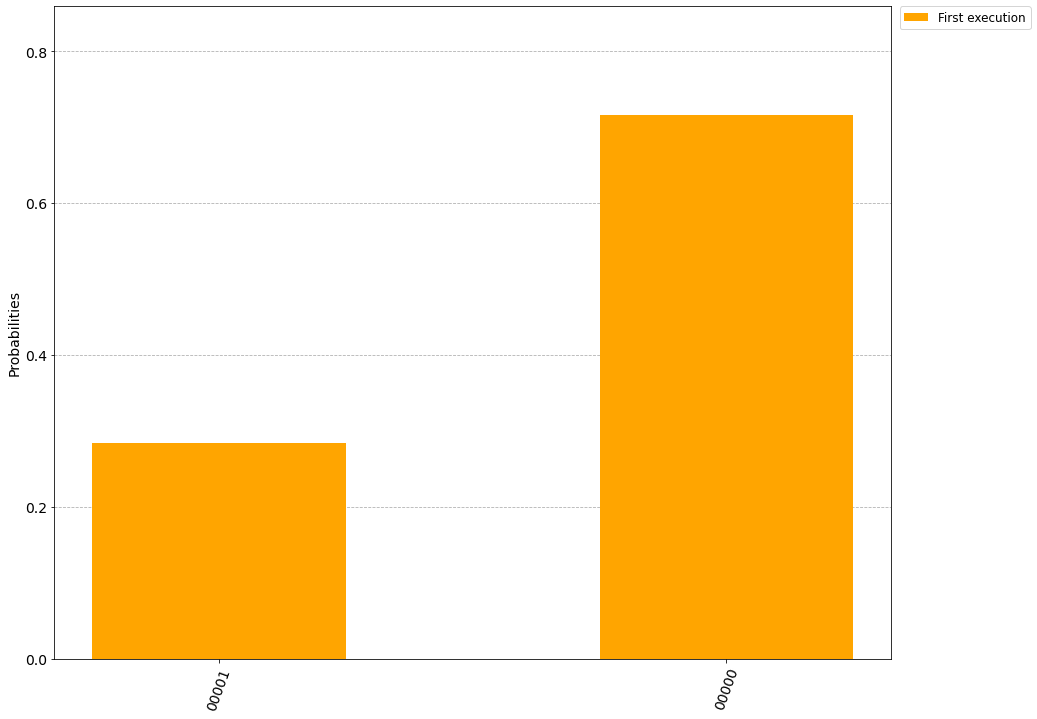

In [34]:
from qiskit.visualization import plot_histogram #Plot histogram of probabilities based on the pre-defined job 
from matplotlib import style


#style.use('dark background')

result = job.result()

counts = result.get_counts(circuit)

#plot_histogram([counts])
legend = ['First execution']
plot_histogram([counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange'], bar_labels=False)



In [36]:
from qiskit import Aer #Simulator framework for qiskit
from qiskit.visualization import plot_state_city, plot_bloch_multivector #Import various modules to view the quantum state using the
# statevector simulator 
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

backend = Aer.get_backend('statevector_simulator')

result = job.result()



result = execute(circuit, backend).result()
a_2_8  = result.get_statevector(circuit)

#plot_histogram([counts])

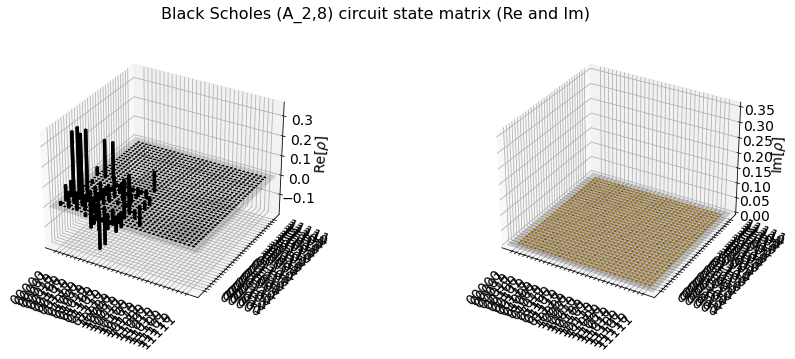

In [37]:
#plot_state_city(a_2_8)

plot_state_city(a_2_8, title="Black Scholes (A_2,8) circuit state matrix (Re and Im)", color=['black', 'orange'])

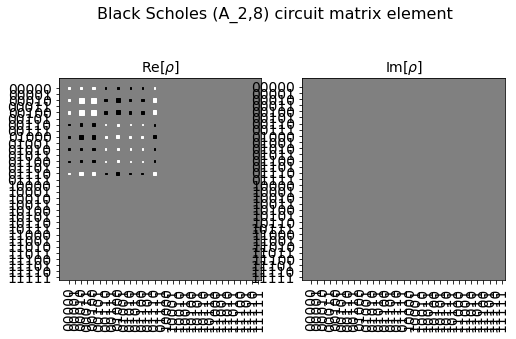

In [38]:
#plot_state_hinton(a_2_8)

plot_state_hinton(a_2_8, title="Black Scholes (A_2,8) circuit matrix element")

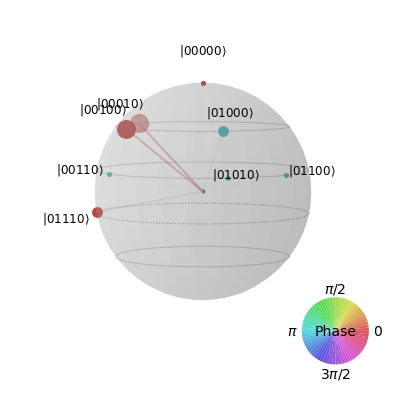

In [39]:
plot_state_qsphere(a_2_8)

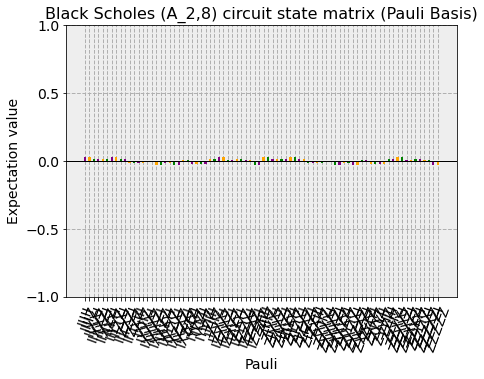

In [40]:
#plot_state_paulivec(a_2_8)

plot_state_paulivec(a_2_8, title="Black Scholes (A_2,8) circuit state matrix (Pauli Basis)", color=['purple', 'orange', 'green'])

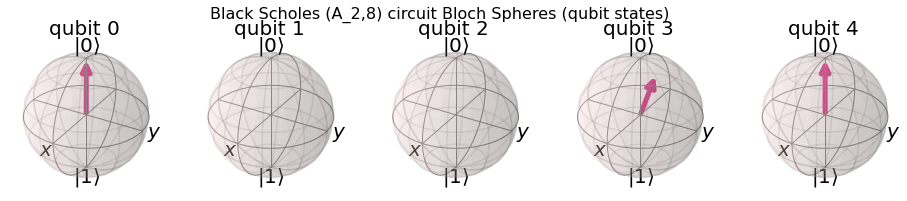

In [41]:
#plot_bloch_multivector(a_2_8)
plot_bloch_multivector(a_2_8, title="Black Scholes (A_2,8) circuit Bloch Spheres (qubit states)")